Practical 4 PART A 

>B-76

> Shivam Gupta


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

(150, 5)


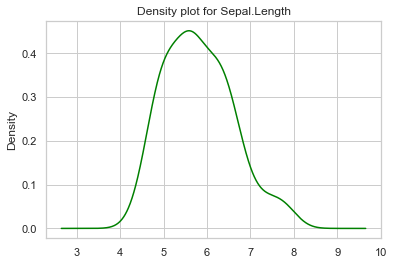

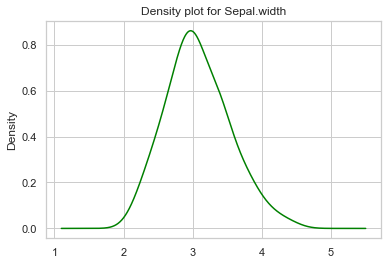

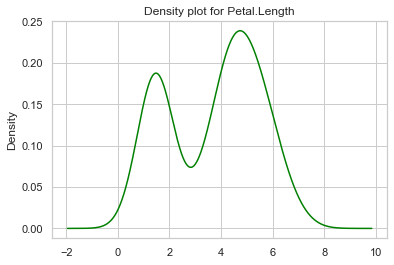

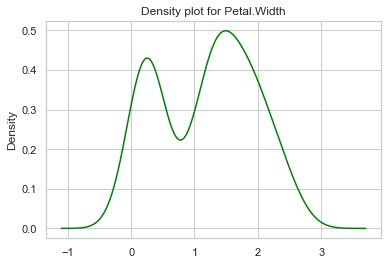

In [ ]:
# i. Plot the density plot for each feature

df = pd.read_csv("data/iris.csv")

df = df.sample(frac=1, random_state=1).reset_index(drop=True)
print(df.shape)

df1 = pd.read_csv("data/iris_train.csv")
df2 = pd.read_csv("data/iris_test.csv")

X1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
X2, y2 = df2.iloc[:, :-1], df2.iloc[:, -1]

X_train, y_train  = X1, y1
X_test, y_test = X2, y2

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

sl=df1['Sepal.Length']
sl.plot.density(color='green')
plt.title('Density plot for Sepal.Length')
plt.show()

sl=df1['Sepal.Width']
sl.plot.density(color='green')
plt.title('Density plot for Sepal.width')
plt.show()

sl=df1['Petal.Length']
sl.plot.density(color='green')
plt.title('Density plot for Petal.Length')
plt.show()

sl=df1['Petal.Width']
sl.plot.density(color='green')
plt.title('Density plot for Petal.Width')
plt.show()

In [ ]:
# ii. Plot the confusion matrix and compute sensitivity, specificity, accuracy for your predictions.

In [ ]:
X_train.shape

(105, 4)

In [ ]:
x = NaiveBayesClassifier()      # FUNCTION CREATED IN LAST CELL
x.fit(X_train, y_train)         # - OF THIS NOTEBOOK

In [ ]:
x.classes, x.feature_nums, x.rows, x.count

(array(['setosa', 'versicolor', 'virginica'], dtype=object), 4, 105, 3)

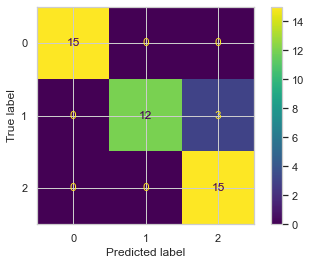

Accuracy:  0.9333333333333333

Specificity:
Class 01 100.0% 
Class 02 100.0% 
Class 03 90.0%

Sensitivity: 
Class 01 100.0 
Class 02 80.0% 
Class 03 100.0%


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import copy

confusion_matrix = metrics.confusion_matrix(list(y_test),list(predictions))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

a=copy.deepcopy(confusion_matrix)
print("Accuracy: ",metrics.accuracy_score(y_test, predictions))

FN=[a[0][1]+a[0][2],a[1][0]+a[1][2],a[2][0]+a[2][1]]
FP=[a[1][0]+a[2][0],a[0][1]+a[2][1],a[0][2]+a[1][2]]

# Specificity
Specificity1 = (a[1][1]+a[2][2])/(a[1][0]+a[2][0]+a[1][1]+a[2][2])
Specificity2 = (a[0][0]+a[2][2])/(a[0][1]+a[2][1]+a[0][0]+a[2][2])
Specificity3 = (a[0][0]+a[1][1])/(a[0][2]+a[1][2]+a[0][0]+a[1][1])

print(f"\nSpecificity:\nClass 01 {Specificity1*100}% \nClass 02 {Specificity2*100}% \nClass 03 {Specificity3*100}%")

# Sensitivity
Sensitivity1 = a[0][0]/(a[0][0]+a[0][1]+a[0][2])
Sensitivity2 = a[1][1]/(a[1][0]+a[1][1]+a[1][2])
Sensitivity3 = a[2][2]/(a[2][0]+a[2][1]+a[2][2])

print(f"\nSensitivity: \nClass 01 {Sensitivity1*100} \nClass 02 {Sensitivity2*100}% \nClass 03 {Sensitivity3*100}%")


In [ ]:
# iii) Compute class wise probabilities and plot the histogram of predicted results.

# x.visualize(y_test, predictions, 'variety')
x.calc_prior(X_train, y_train)

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
x.prior

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
predictions = x.predict(X_test)

In [ ]:
x.accuracy(y_test, predictions)

0.9333333333333333

In [ ]:
y_test.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: Species, dtype: float64

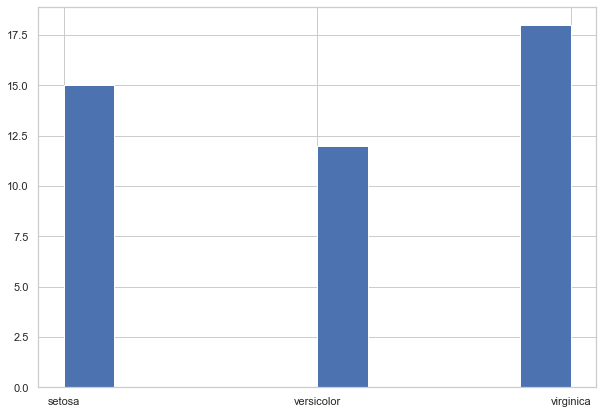

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(predictions)
 
# Show plot
plt.show()

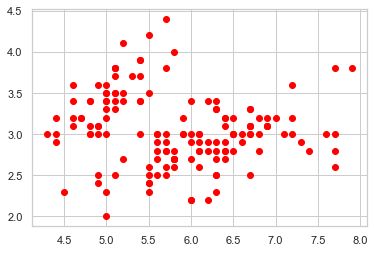

In [ ]:
# iv. Plot scatter plot showing the decision boundary for Sepal length vs. Sepal width for
# all species.

class NaiveBayesClassifier():
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def calc_statistics(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []
        for i in range(self.count):
            prior = np.log(self.prior[i]) 
            conditional = np.sum(np.log(self.gaussian_density(i, x))) 
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        fig.suptitle('True vs Predicted Comparison', fontsize=20)
        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

df['variety'] = pd.Series(df.variety)
df.head()
a1 = df['sepal.length']
a2 = df['sepal.width']
plt.scatter(a1,a2,c="red")